# Лабораторная работа 2 "Моделирование дискретных случайных величин (ДСВ)"

## Ширяева Ольга, 4 курс, 3 группа

## Вариант 12

## Бернулли – Bi(1,p), p = 0.9; Геометрическое – G(p), p = 0.7

## Задание 1.

### Осуществить моделирование n = 1000 реализаций СВ из заданных дискретных распределений. 

###  Бернулли https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%91%D0%B5%D1%80%D0%BD%D1%83%D0%BB%D0%BB%D0%B8

### Геометрическое https://ru.wikipedia.org/wiki/%D0%93%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5


In [618]:
p_bernoulli = 0.9
p_geometric = 0.7
n = 1000

In [619]:
from random import random


def bernoulli(p, n):
    for i in range(n):
        yield 0 if p < random() else 1

In [620]:
bernoulli_seq = list(bernoulli(p_bernoulli, n))

for i in range(10):
    print(bernoulli_seq[int(random() * n)])

1
1
1
1
1
0
1
1
0
1


In [621]:
def geometric_v1(p, n):
    for i in range(n):
        b = list(bernoulli(p, int(n)))
        i = 0
        while i < len(b):
            if b[i] == 1:
                break
            i += 1
        yield i

In [622]:
geometric_seq_v1 = list(geometric_v1(p_geometric, n))

for i in range(10):
    print(geometric_seq_v1[int(random() * n)])

0
0
1
2
0
2
0
0
0
1


In [623]:
import math


def geometric_v2(p, n):
    for i in range(n):
        a = random()
        x = abs(math.ceil(math.log2(a) / math.log2(1 - p)))
        yield x     

In [624]:
geometric_seq_v2 = list(geometric_v2(p_geometric, n))

for i in range(10):
    print(geometric_seq_v2[int(random() * n)])

2
1
2
2
2
1
1
1
1
1


In [625]:
def expectation(seq):
    sum = 0.
    for value in seq:
        sum += value
        
    return sum / len(seq)


def variance(seq, exp):
    var = 0.
    for value in seq:
        var += (value - exp) ** 2
    
    return var / len(seq)

In [626]:
bernoulli_expectation = p_bernoulli
bernoulli_variance = p_bernoulli * (1 - p_bernoulli)
geometric_expectation_v1 = (1 - p_geometric) / p_geometric
geometric_expectation_v2 = 1 / p_geometric
geometric_variance = (1 - p_geometric) / p_geometric ** 2

In [627]:
bernoulli_exp = expectation(bernoulli_seq)
bernoulli_var = variance(bernoulli_seq, bernoulli_exp)

geometric_exp_v1 = expectation(geometric_seq_v1)
geometric_var_v1 = variance(geometric_seq_v1, geometric_exp_v1)


geometric_exp_v2 = expectation(geometric_seq_v2)
geometric_var_v2 = variance(geometric_seq_v2, geometric_exp_v2)

In [628]:
print('Bernoulli')
print('Theoretic : E = {}, D = {}'.format(bernoulli_expectation, bernoulli_variance))
print('Actual :    E = {}, D = {}'.format(bernoulli_exp, bernoulli_var))
print()
print('Geometric Version 1')
print('Theoretic : E = {}, D = {}'.format(geometric_expectation_v1, geometric_variance))
print('Actual :    E = {}, D = {}'.format(geometric_exp_v1, geometric_var_v1))
print()
print('Geometric Version 2')
print('Theoretic : E = {}, D = {}'.format(geometric_expectation_v2, geometric_variance))
print('Actual :    E = {}, D = {}'.format(geometric_exp_v2, geometric_var_v2))


Bernoulli
Theoretic : E = 0.9, D = 0.08999999999999998
Actual :    E = 0.902, D = 0.08839600000000021

Geometric Version 1
Theoretic : E = 0.42857142857142866, D = 0.6122448979591838
Actual :    E = 0.415, D = 0.620775000000009

Geometric Version 2
Theoretic : E = 1.4285714285714286, D = 0.6122448979591838
Actual :    E = 1.432, D = 0.6353760000000054


In [629]:
def bernoulli_probabilty(x):
    if x == 1:
        return p_bernoulli
    else:
        return 1 - p_bernoulli
    
    
def geometric_probability_v1(x):
    return (1 - p_geometric) ** x * p_geometric
    
    
def geometric_probability_v2(x):
    return (1 - p_geometric) ** (x - 1) * p_geometric    

In [630]:
def get_bernoulli_frequencies(seq):
    zeroes = 0
    ones = 0
    
    for value in seq:
        if value is 0:
            zeroes += 1
        else:
            ones += 1
    
    return [zeroes, ones]


def bernoulli_chi_square(seq):
    freqs = get_bernoulli_frequencies(bernoulli_seq)
    size = len(seq)
    return (freqs[0] - (1 - p_bernoulli) * size) ** 2 / ((1 - p_bernoulli) * size) + (freqs[1] - p_bernoulli * size) ** 2 / (p_bernoulli * size)

In [ ]:
def frequencies(seq, n):
    seq = sorted(seq, key=float)
    size = len(seq)
    frequencies = []
    j = 0
    for i in range(n):
        count = 0    
        while j < size and seq[j] == i:
                j += 1
                count += 1
        frequencies.append(count)
    return frequencies


def discrete_chi_square(seq, prob_function):
    chi = 0.
    size= len(seq)
    geom = sorted(seq)
    max = geom[len(geom) - 1]
    freqs = frequencies(geom, max)
    freqs_size = len(freqs)
    for i in range(freqs_size):
        value = freqs[i]
        probability = prob_function(i)
        if i == 0 and value == 0:
            continue
        chi += (value - probability * size) ** 2 / (probability * size)
        
    return chi, freqs_size   

In [632]:
CHI_SQUARE_DELTA = {
    2: 3.841,
    3: 5.991,
    4: 7.815,
    5: 9.488,
    6: 11.070,
    7: 12.592,
    8: 14.067,
    9: 15.507,
    10: 16.919,
    11: 18.307,
    12: 19.675,
    13: 21.026,
    14: 22.362,
    15: 23.685,
    16: 24.996,
    17: 26.296,
    18: 27.587,
    19: 28.869,
    20: 30.144,
    21: 31.410,
    22: 32.671,
    23: 33.924,
    24: 35.172,
    25: 36.415,
    26: 37.652,
    27: 38.885,
    28: 40.113,
    29: 41.337,
    30: 42.557
}

In [633]:
b_chi = bernoulli_chi_square(bernoulli_seq)
g_chi_v1, size_v1 = discrete_chi_square(geometric_seq_v1,geometric_probability_v1)
g_chi_v2, size_v2 = discrete_chi_square(geometric_seq_v2,geometric_probability_v2)

print('Bernoulli chi-square : {} < 3,8415'.format(b_chi))
print('Geometric chi-square version 1: {} < {}, k = {}'.format(g_chi_v1, CHI_SQUARE_DELTA[size_v1], size_v1 - 1))
print('Geometric chi-square version 2: {} < {}, k = {}'.format(g_chi_v2, CHI_SQUARE_DELTA[size_v2], size_v2 - 1))

Bernoulli chi-square : 0.04444444444444332 < 3,8415
Geometric chi-square version 1: 3.652292768959437 < 9.488, k = 4
Geometric chi-square version 2: 1.7991128747795404 < 12.592, k = 6


## Распределение Пуассона lambda = 4

### https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D1%83%D0%B0%D1%81%D1%81%D0%BE%D0%BD%D0%B0

In [634]:
poisson_lambda = 4

In [635]:
from math import exp

def poisson(rate, n):
    l = exp(-1 * rate)
    
    for i in range(n):
        p = 1.0
        k = -1
        while p > l:
            p *= random()
            k += 1
        yield k

In [636]:
poisson_seq = list(poisson(poisson_lambda, n))

for i in range(10):
    print(poisson_seq[i])

3
5
7
3
1
1
2
7
3
3


## Биномиальное распределение Bi(m, p) m = 5, p = 0.6

### https://ru.wikipedia.org/wiki/%D0%91%D0%B8%D0%BD%D0%BE%D0%BC%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5

In [637]:
m = 5
p_binominal = 0.6

In [638]:
def binominal(m, p, n):
    for i in range(n):
        sum = 0
        for j in range(m):
            sum += list(bernoulli(p, 1))[0]            
        yield sum

In [639]:
binominal_seq = list(binominal(m, p_binominal, n))

for i in range(10):
    print(binominal_seq[i])

4
2
4
4
2
4
2
2
2
0


In [640]:
poisson_expectation = poisson_lambda
poisson_variance = poisson_lambda

binominal_expectation = m * p_binominal
binominal_variance = m * p_binominal * (1 - p_binominal)

poisson_exp = expectation(poisson_seq)
poisson_var = variance(poisson_seq, poisson_exp)

binominal_exp = expectation(binominal_seq)
binominal_var = variance(binominal_seq, binominal_exp)

In [641]:
print('Poisson')
print('Theoretic : E = {}, D = {}'.format(poisson_expectation, poisson_variance))
print('Actual :    E = {}, D = {}'.format(poisson_exp, poisson_var))
print()
print('Binominal')
print('Theoretic : E = {}, D = {}'.format(binominal_expectation, binominal_variance))
print('Actual :    E = {}, D = {}'.format(binominal_exp, binominal_var))

Poisson
Theoretic : E = 4, D = 4
Actual :    E = 3.863, D = 4.016230999999977

Binominal
Theoretic : E = 3.0, D = 1.2000000000000002
Actual :    E = 2.934, D = 1.2396439999999977


In [642]:
from math import factorial

def C(n, k):
    return factorial(n) / (factorial(k) * factorial(n - k))

def poisson_probability(x):
    return exp(- 1 * poisson_lambda) * poisson_lambda ** x / factorial(x)

def binominal_probability(x):
    return C(m, x) * p_binominal ** x * (1 - p_binominal) ** (m - x)
    

In [643]:
p_chi, size_p = discrete_chi_square(poisson_seq, poisson_probability)
b_chi, size_b = discrete_chi_square(binominal_seq, binominal_probability)

print('Bernoulli chi-square : {} < {}, k = {}'.format(p_chi, CHI_SQUARE_DELTA[size_p], size_p - 1))
print('Binominal chi-square : {} < {}, k = {}'.format(b_chi, CHI_SQUARE_DELTA[size_b], size_b - 1))

Bernoulli chi-square : 16.405579141267282 < 21.026, k = 12
Binominal chi-square : 5.51874228395061 < 9.488, k = 4


## Вычислить несмещенные оценки коэффициентов эксцесса и асимметрии и сравнить с истинными значениями.

### Kurtosis https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0

### Skewness https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B0%D1%81%D0%B8%D0%BC%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%B8

In [644]:
def moment(seq, exp, rang):
    n = len(seq)
    m = 0.
    for i in range(n):
        m += (seq[i] - exp) ** rang
    
    return m / n

In [645]:
def kurtosis(seq, exp):
    mu_4 = moment(seq, exp, 4)
    sigma_4 = moment(seq, exp, 2) ** 2
    
    return mu_4 / sigma_4 - 3

def skewness(seq, exp):
    mu_3 = moment(seq, exp, 3)
    sigma_3 = moment(seq, exp, 2) ** (3 / 2)
    
    return mu_3 / sigma_3

In [646]:
bernoulli_kurtosis_th = (6 * p_bernoulli ** 2 - 6 * p_bernoulli + 1) / (p_bernoulli * (1 - p_bernoulli))
bernoulli_skewness_th = (1 - 2 * p_bernoulli) / (p_bernoulli * (1 - p_bernoulli)) ** (1 / 2)
bernoulli_kurtosis_act = kurtosis(bernoulli_seq, bernoulli_exp)
bernoulli_skewness_act = skewness(bernoulli_seq, bernoulli_exp)

geometric_kurtosis_th = 6 + p_geometric ** 2 / (1 - p_geometric)
geometric_skewness_th = (2 - p_geometric) / (1 - p_geometric) ** (1 / 2)
geometric_v1_kurtosis_act = kurtosis(geometric_seq_v1, geometric_exp_v1)
geometric_v1_skewness_act = skewness(geometric_seq_v1, geometric_exp_v1)
geometric_v2_kurtosis_act = kurtosis(geometric_seq_v2, geometric_exp_v2)
geometric_v2_skewness_act = skewness(geometric_seq_v2, geometric_exp_v2)

poisson_kurtosis_th = 1 / poisson_lambda
poisson_skewness_th = poisson_lambda ** ( -1 / 2)
poisson_kurtosis_act = kurtosis(poisson_seq, poisson_exp)
poisson_skewness_act = skewness(poisson_seq, poisson_exp)

binominal_kurtosis_th = (1 - 6 * p_binominal * (1 - p_binominal)) / (m * p_binominal * (1 - p_binominal))
binominal_skewness_th = (1 - 2 * p_binominal) / (m * p_binominal * (1 - p_binominal)) ** (1 / 2)
binominal_kurtosis_act = kurtosis(binominal_seq, binominal_exp)
binominal_skewness_act = skewness(binominal_seq, binominal_exp)

In [647]:
print('Bernoulli')
print('Theoretic : Kurtosis = {}, Skewness = {}'.format(bernoulli_kurtosis_th, bernoulli_skewness_th))
print('Actual :    Kurtosis = {}, Skewness = {}'.format(bernoulli_kurtosis_act, bernoulli_skewness_act))
print()
print('Geometric Version 1')
print('Theoretic : Kurtosis = {}, Skewness = {}'.format(geometric_kurtosis_th, geometric_skewness_th))
print('Actual :    Kurtosis = {}, Skewness = {}'.format(geometric_v1_kurtosis_act, geometric_v1_skewness_act))
print()
print('Geometric Version 2')
print('Theoretic : Kurtosis = {}, Skewness = {}'.format(geometric_kurtosis_th, geometric_skewness_th))
print('Actual :    Kurtosis = {}, Skewness = {}'.format(geometric_v2_kurtosis_act, geometric_v2_skewness_act))
print()
print('Poisson')
print('Theoretic : Kurtosis = {}, Skewness = {}'.format(poisson_kurtosis_th, poisson_skewness_th))
print('Actual :    Kurtosis = {}, Skewness = {}'.format(poisson_kurtosis_act, poisson_skewness_act))
print()
print('Binominal')
print('Theoretic : Kurtosis = {}, Skewness = {}'.format(binominal_kurtosis_th, binominal_skewness_th))
print('Actual :    Kurtosis = {}, Skewness = {}'.format(binominal_kurtosis_act, binominal_skewness_act))

Bernoulli
Theoretic : Kurtosis = 5.111111111111112, Skewness = -2.666666666666667
Actual :    Kurtosis = 5.312729082763942, Skewness = -2.7042058136843004

Geometric Version 1
Theoretic : Kurtosis = 7.633333333333333, Skewness = 2.3734644158557194
Actual :    Kurtosis = 6.287594281112092, Skewness = 2.3485014441691145

Geometric Version 2
Theoretic : Kurtosis = 7.633333333333333, Skewness = 2.3734644158557194
Actual :    Kurtosis = 7.541600100843157, Skewness = 2.4087354620763035

Poisson
Theoretic : Kurtosis = 0.25, Skewness = 0.5
Actual :    Kurtosis = 0.32064864184940767, Skewness = 0.47612932820207254

Binominal
Theoretic : Kurtosis = -0.3666666666666666, Skewness = -0.1825741858350553
Actual :    Kurtosis = -0.40730946551515856, Skewness = -0.19581281295230438


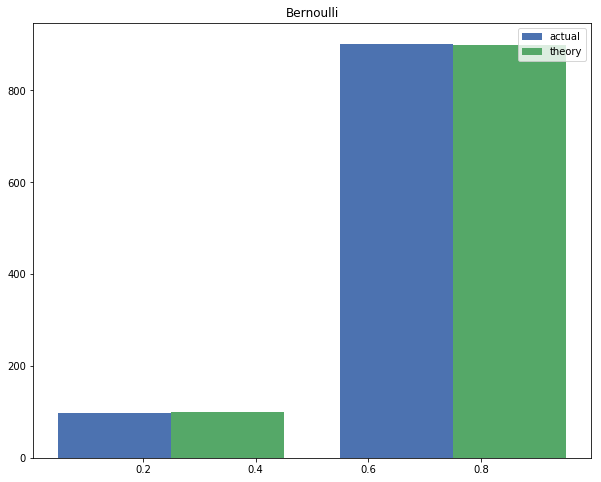

[98, 902]
[100, 900]


In [814]:
% matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=[10,8])

data_bern = [0 if i < n / 10 else 1 for i in range(n)]

plt.hist([bernoulli_seq, data_bern], 2, label=['actual', 'theory'])
plt.legend(loc='upper right')
plt.title('Bernoulli')
plt.show()


print(get_bernoulli_frequencies(bernoulli_seq))
print(get_bernoulli_frequencies(data_bern))

In [831]:
def geometric_th_v1(p, n, max_value):
    values = []
    for i in range (max_value + 1):
        num = int((1 - p_geometric) ** i * p_geometric * n)
        for j in range(num):
            values.append(i)
        
    return values  

def geometric_th_v2(p, n, max_value):
    values = []
    for i in range (1, max_value + 1):
        num = int((1 - p_geometric) ** (i - 1) * p_geometric * n)
        for j in range(num):
            values.append(i)
        
    return values  

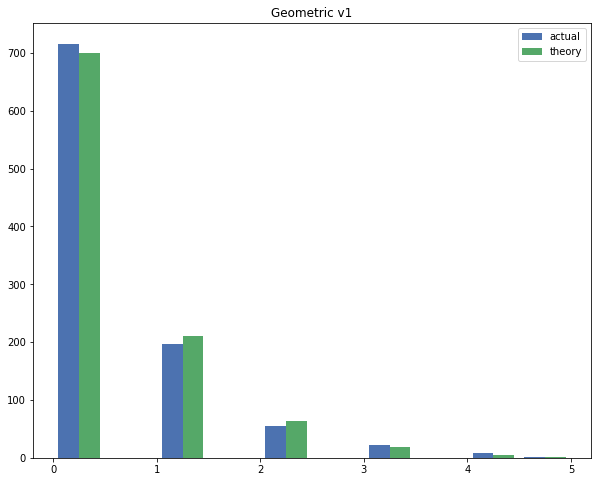

In [832]:
geom_v1 = geometric_th_v1(p_geometric, n, size_v1)

plt.figure(figsize=[10,8])
plt.hist([geometric_seq_v1, geom_v1], label=['actual', 'theory'])
plt.legend(loc='upper right')
plt.title('Geometric v1')
plt.show()

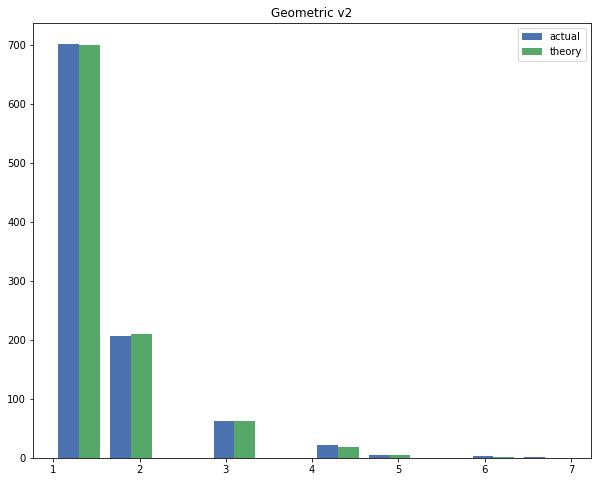

In [840]:
geom_v2 = geometric_th_v2(p_geometric, n, size_v2)

plt.figure(figsize=[10,8])
plt.hist([geometric_seq_v2, geom_v2], label=['actual', 'theory'])
plt.legend(loc='upper right')
plt.title('Geometric v2')
plt.show()

In [841]:
def poisson_theory(k):
    values = []
    for i in range(k):
        num = int(poisson_probability(i) * n)
        for j in range(num):
            values.append(i)
    return values

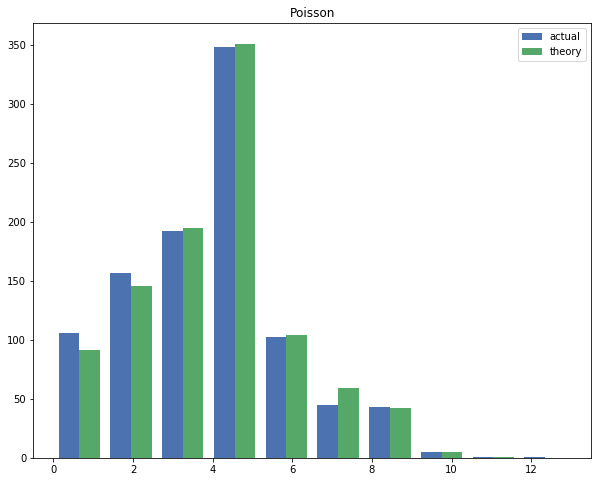

In [842]:
poisson_th = poisson_theory(max(poisson_seq))

plt.figure(figsize=[10,8])
plt.hist([poisson_seq, poisson_th], label=['actual', 'theory'])
plt.legend(loc='upper right')
plt.title('Poisson')
plt.show()

In [843]:
def binominal_theory(k):
    freqs = []
    for i in range(k):
        num = int(binominal_probability(i) * n)
        for j in range(num):
            freqs.append(i)
    return freqs

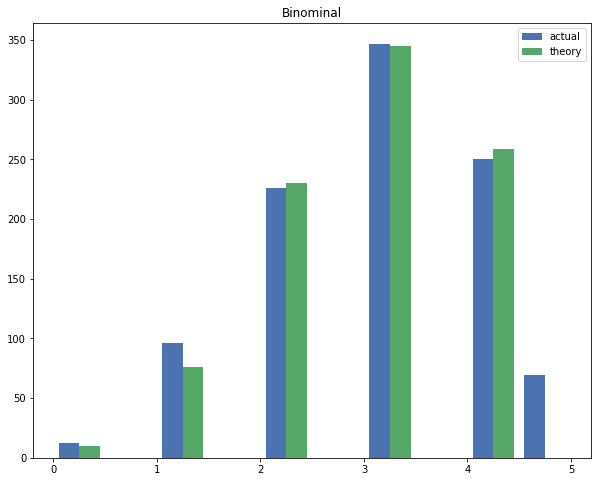

In [844]:
binominal_th = binominal_theory(max(binominal_seq))

plt.figure(figsize=[10,8])
plt.hist([binominal_seq, binominal_th], label=['actual', 'theory'])
plt.legend(loc='upper right')
plt.title('Binominal')
plt.show()